In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


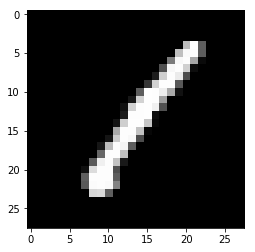

In [5]:
img1 = train_data.iloc[0,1:].values.reshape(28,28)
plt.imshow(img1,cmap='gray')
plt.show()

In [6]:
X = train_data.iloc[:,1:].values
y = train_data.iloc[:,0].values

In [7]:
X.shape

(42000, 784)

## Reshape each sample to 28X28 matrix, and apply one hot encoding to label y

In [8]:
X = X.reshape(-1,28,28)
X=X[:,:,:,np.newaxis]
X.shape

(42000, 28, 28, 1)

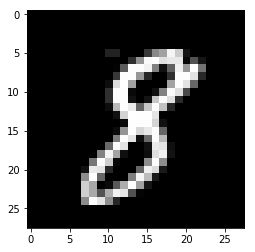

In [9]:
plt.imshow(X[20,:,:,0],cmap='gray')
plt.show()

In [10]:
from keras.utils import to_categorical
y=to_categorical(y)

Using TensorFlow backend.


In [11]:
y.shape

(42000, 10)

In [12]:
y[20,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [13]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

# Design neural network architechture
## Let's implement the structure on tensorflow tutorial
https://www.tensorflow.org/tutorials/layers

    1.Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
    2.Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
    3.Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
    4.Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
    5.Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
    6.Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).

In [14]:
def DigitModel(input_shape):
    """
    Implementation of the model.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    # Define the input placeholder as a tensor with shape input_shape.
    X_input = Input(input_shape)

    # CONV -> RELU Block applied to X
    X = Conv2D(filters=32, kernel_size=(5, 5), strides = (1, 1), padding = 'same', activation = 'relu', name = 'conv0')(X_input)

    # MAXPOOL
    X = MaxPooling2D(pool_size=(2, 2), strides = (2,2), name='max_pool1')(X)
    
    # CONV -> RELU Block
    X = Conv2D(filters=64, kernel_size=(5, 5), strides = (1, 1), padding = 'same', activation = 'relu', name = 'conv1')(X)
    
    # MAXPOOL
    X = MaxPooling2D(pool_size=(2, 2), strides = (2,2), name='max_pool2')(X)

    # Dense + dropout
    X = Flatten()(X)
    X = Dense(1024, activation='relu', name='dense1')(X)
    X = Dropout(rate = 0.4)(X)
    
    # Dense + softmax
    X = Dense(10, activation='softmax', name='dense2')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='DigitModel')

    return model

To train and test this model, there are four steps in Keras:

    1.Create the model by calling the function above
    2.Compile the model by calling model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])
    3.Train the model on train data by calling model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)
    4.Test the model on test data by calling model.evaluate(x = ..., y = ...)


In [15]:
digitmodel = DigitModel((28,28,1))

In [16]:
from keras import optimizers
optimizer = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [17]:
digitmodel.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
digitmodel.fit(X, y, epochs= 5, batch_size=64, verbose=1)

Epoch 1/5
42000/42000 [==============================] - 166s 4ms/step - loss: 14.4924 - acc: 0.1008
Epoch 2/5
42000/42000 [==============================] - 169s 4ms/step - loss: 14.3205 - acc: 0.1115
Epoch 3/5
42000/42000 [==============================] - 172s 4ms/step - loss: 14.3205 - acc: 0.1115
Epoch 4/5
42000/42000 [==============================] - 174s 4ms/step - loss: 14.3205 - acc: 0.1115
Epoch 5/5
42000/42000 [==============================] - 163s 4ms/step - loss: 14.3205 - acc: 0.1115


## The training takes a long time. After 5 epochs, the loss doesn't really drop. 

Let us plot the structure of our model. 

In [18]:
plot_model(digitmodel, to_file='DigitModel.png')
#SVG(model_to_dot(digitmodel).create(prog='dot', format='svg'))

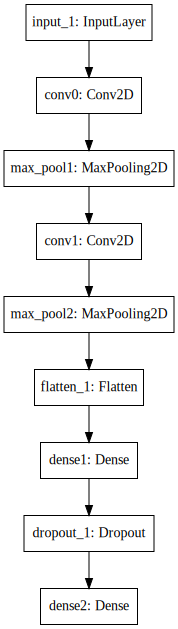

In [19]:
SVG(model_to_dot(digitmodel).create(prog='dot', format='svg'))

In [24]:
digitmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 28, 28, 32)        832       
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense1 (Dense)               (None, 1024)              3212288   
__________